In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import utils.rd_plot_functions as pf  
import numpy as np
import pandas as pd
import utils.rate_distortion as rd
sns.set_style('darkgrid')
import math
import scipy
import copy
import scipy.stats
from pylab import cm
from IPython.display import Image

# Model comparisons

In [45]:
rd_ica_lloydv2 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/rd_by_img_lloyd')
# rd_ica_lloyd = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/rd_by_img_lloyd_v2')
rd_pca_lloyd3 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/pca/rd_by_img_lloyd3')
rd_pca_lloydv2 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/pca/rd_by_img_lloyd_v2')
rd_lca_lloyd = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/rd_by_img_lloyd')
rd_lca_lloyd2 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/rd_by_img_lloyd2')
rd_lca_lloydv2 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/rd_by_img_lloyd_v2')

In [48]:
rd_ica_lloydv2

model  n_neurons  overcompleteness  cost lambda  p_active  n_active  \
0  ica_v1.0        256               1.0  None   None       1.0     256.0   
1  ica_v1.0        256               1.0  None   None       1.0     256.0   
2  ica_v1.0        256               1.0  None   None       1.0     256.0   

                                                 mse        mse_sd  \
0  [7.348310034002295e-07, 7.316121723708485e-07,...  1.627667e-08   
1  [6.791231998223258e-06, 9.54387414852828e-06, ...  2.123239e-06   
2  [1.3365387554659822e-05, 1.9355858186148186e-0...  4.755551e-06   

                                             log_mse  \
0  [-14.1236252915, -14.1280152826, -14.078227348...   
1  [-11.8998781898, -11.5596110597, -11.5242331, ...   
2  [-11.2228422111, -10.8525154357, -11.129567728...   

                                                psnr  \
0  [73899.56095938987, 108906.4055022487, 74686.4...   
1  [7996.1468765655445, 8348.522903237088, 5808.3...   
2  [4063.008895817016, 4116.441190482625, 3914.30...   

                                             psnr_db  \
0  [48.68641858239471, 50.370534242228885, 48.732...   
1  [39.02880762821779, 39.21609642942334, 37.6405...   
2  [36.08847773200153, 36.14521915245821, 35.9265...   

                                                ssim  \
0  [0.9995059791820431, 0.9989754000763124, 0.998...   
1  [0.9942489991787832, 0.9861026995570206, 0.985...   
2  [0.9884671007324579, 0.9733075536316509, 0.976...   

                                             entropy  transmission_rate  \
0  [4.15245889151535, 4.2494646116782935, 4.06398...           3.856992   
1  [2.7252552976166067, 2.7897105615519986, 2.658...           2.558020   
2  [2.381295579082957, 2.3872400463621797, 2.3008...           2.229918   

   bin_width  num_bins  bin_ratio  
0        0.1    1201.0   0.004899  
1        0.5     241.0   0.024497  
2        1.0     121.0   0.048994

In [51]:
frames = [rd_lca_lloyd, rd_lca_lloyd2, rd_lca_lloydv2, rd_pca_lloydv2, rd_pca_lloyd3, rd_ica_lloyd]
rd_table_lloyd = pd.concat(frames)
rd_table_lloyd = rd_table_lloyd.reset_index()

In [60]:
rd_pca = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/pca/rd_by_img_cropped_test')
rd_lca_l0 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/rd_by_img_cropped_test')
rd_lca_l1 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/rd_by_img_l1')
rd_ica = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/rd_by_img_cropped_test')
rd_lca_9 = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/rd_by_img_uniform_.9')
# rd_pca_crop = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/pca/rd_by_img_cropped_test')
# rd_lca_l0_crop = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/lca_ft_posneg/rd_by_img_cropped_test')
# rd_ica_crop = pd.read_pickle('/media/tbell/sanborn/rd_analysis/outputs/ica/rd_by_img_cropped_test')

In [61]:
frames = [rd_lca_l0, rd_lca_l1, rd_lca_9, rd_pca, rd_ica]
rd_table = pd.concat(frames)
rd_table = rd_table.reset_index()

In [82]:
frames = [rd_lca_l0, rd_lca_l1, rd_pca, rd_ica]
rd_table = pd.concat(frames)
rd_table = rd_table.reset_index()

In [38]:
frames = [rd_lca_l0_crop, rd_pca_crop, rd_ica_crop]
rd_table_crop = pd.concat(frames)
rd_table_crop = rd_table_crop.reset_index()

np.sqrt(rd_table.n_neurons[0])

## Alternative models

## Full comparisons

In [9]:
def plot_rd_by_img(rd_table, xval="entropy", yval="mse", xlim=None, ylim=None, bad_data_idx=[17], cmap="magma"):
    plt.rcParams["figure.figsize"] = [20,15]
    models = rd_table.model.unique()
    colors = cm.get_cmap(cmap, len(models))
    legend_patches = [plt.Line2D([0], [0], color=colors(i), lw=8) for i, x in enumerate(models)]
    fig, ax = plt.subplots()
    for a, m in enumerate(models):
        data = rd_table[rd_table["model"] == m]
        XVALS = []
        YVALS = []
        for b, row in data.iterrows():
            xvals = [x for i, x in enumerate(data[xval][b]) if i not in bad_data_idx]
            yvals = [x for i, x in enumerate(data[yval][b]) if i not in bad_data_idx]
            mean_x = np.mean(xvals)
            mean_y = np.mean(yvals)
            XVALS.append(mean_x)
            YVALS.append(mean_y)
            for c, val in enumerate(xvals):  
                x_pairs = [xvals[c], mean_x]
                y_pairs = [yvals[c], mean_y]
                ax.plot(x_pairs, y_pairs, '-o', c=colors(a), alpha=0.15, linewidth=2)
        ax.plot(XVALS, YVALS, '-o', c=colors(a), markersize=10, linewidth=4)
    ax.legend(legend_patches, models, prop={'size': 20})
    if xlim is not None:
        plt.xlim((0, xlim))
    if ylim is not None:
        plt.ylim((0, ylim))
    plt.ylabel(yval, fontsize=25)
    plt.xlabel(xval, fontsize=25)

In [10]:
def plot_rd_by_img_per_img(rd_table, model_name, num_images=25, xval="entropy", yval="mse", xlim=None, ylim=None, cmap="rainbow"):
    data = rd_table[rd_table["model"] == model_name]
    plt.rcParams["figure.figsize"] = [20,15]
    colors = cm.get_cmap(cmap, num_images)
    legend_patches = [plt.Line2D([0], [0], color=colors(i), lw=8) for i in range(num_images)]
    XVALS = []; YVALS = []
    fig, ax = plt.subplots()
    for a in range(num_images):
        for b, row in data.iterrows():
            XVALS.append(row[xval][a])
            YVALS.append(row[yval][a])
        plt.plot(XVALS, YVALS, '-o', c=colors(a), markersize=5, linewidth=3)
        XVALS = []; YVALS = []     
    ax.legend(legend_patches, range(num_images), prop={'size': 20})
    if xlim is not None:
        plt.xlim((0, xlim))
    if ylim is not None:
        plt.ylim((0, ylim)) 
    plt.ylabel(yval, fontsize=25)
    plt.xlabel(xval, fontsize=25)
    plt.suptitle(model_name, fontsize=30)

# Per image curves

## MSE

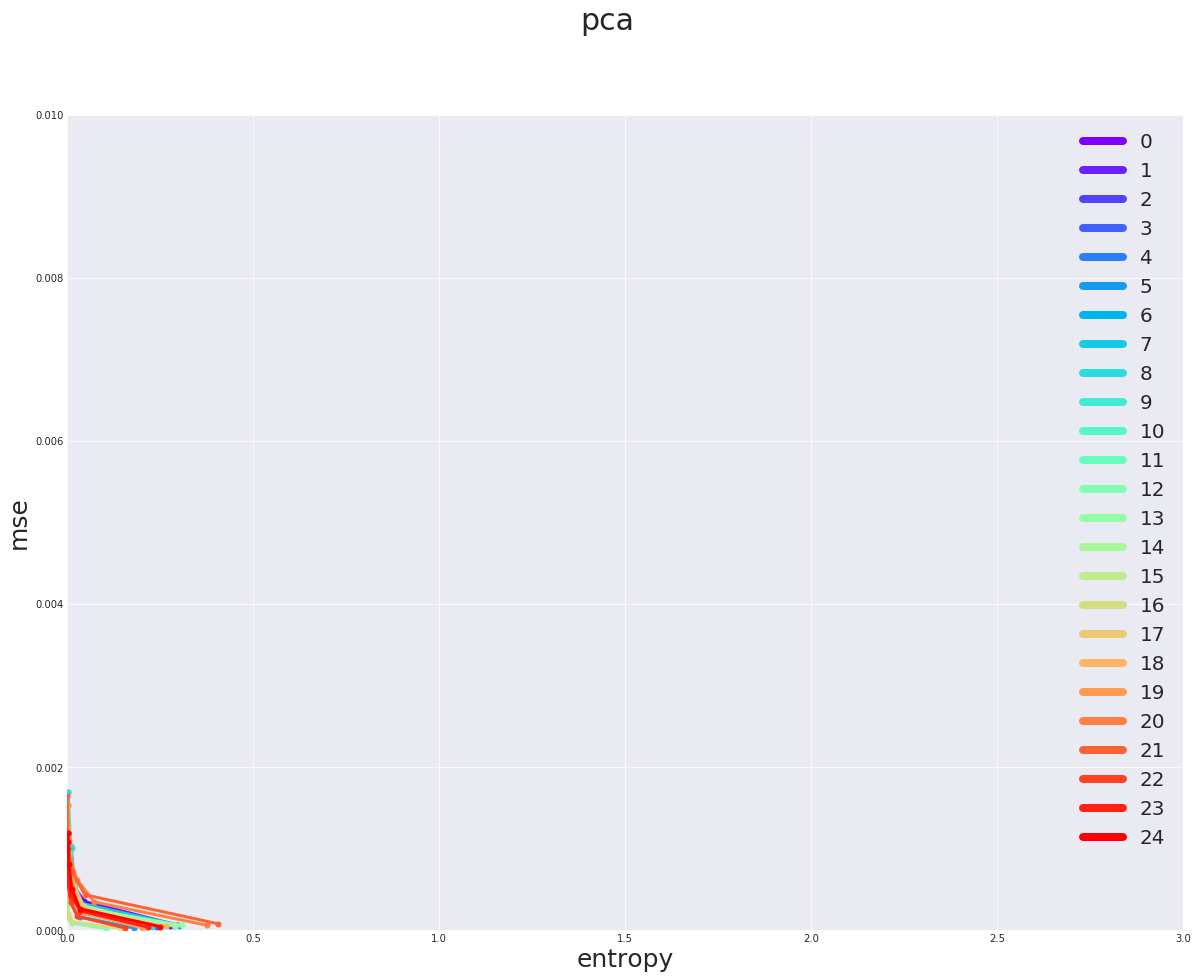

In [14]:
plot_rd_by_img_per_img(rd_table_lloyd, "pca", xlim= 3, ylim=.01)

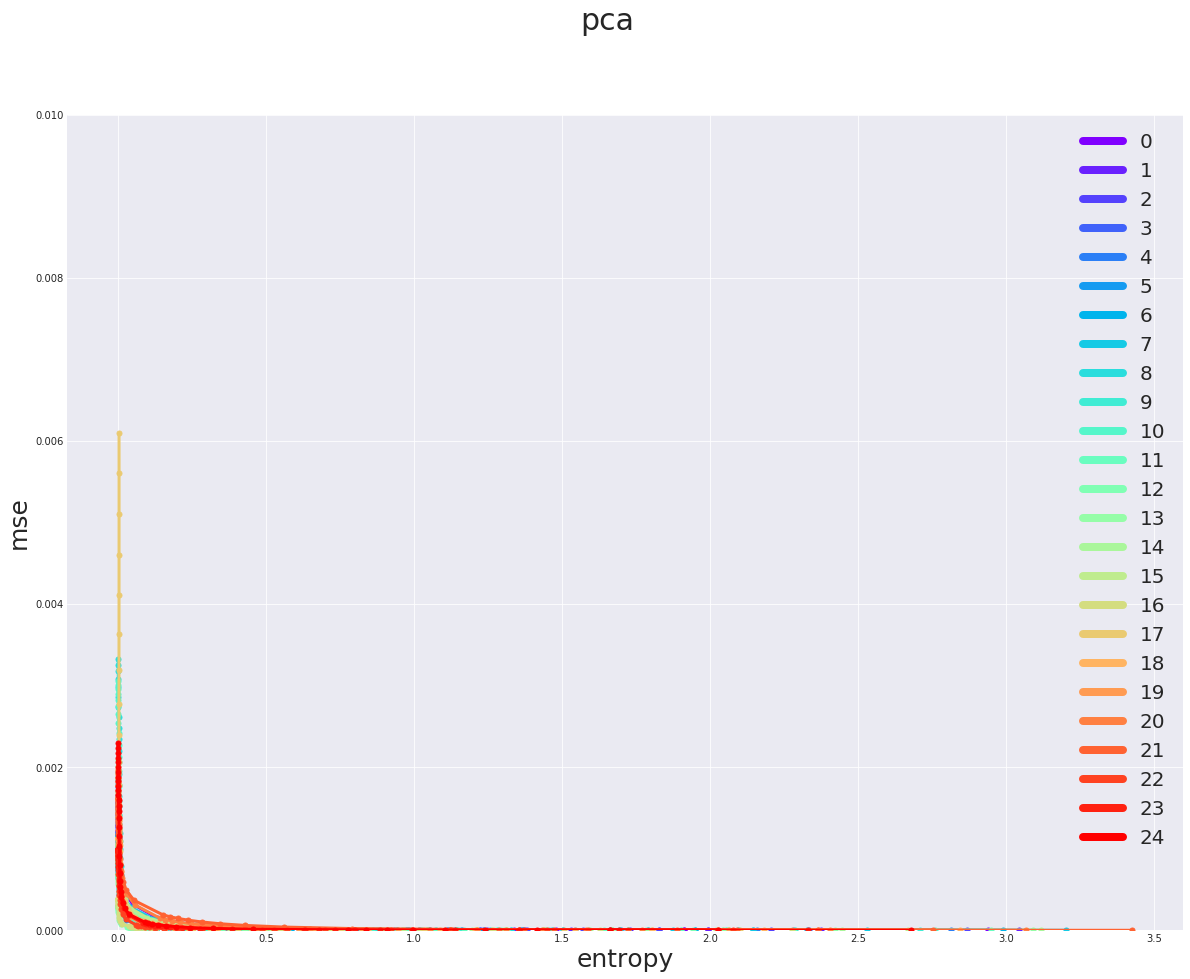

In [72]:
plot_rd_by_img_per_img(rd_table, "pca", ylim=.01)

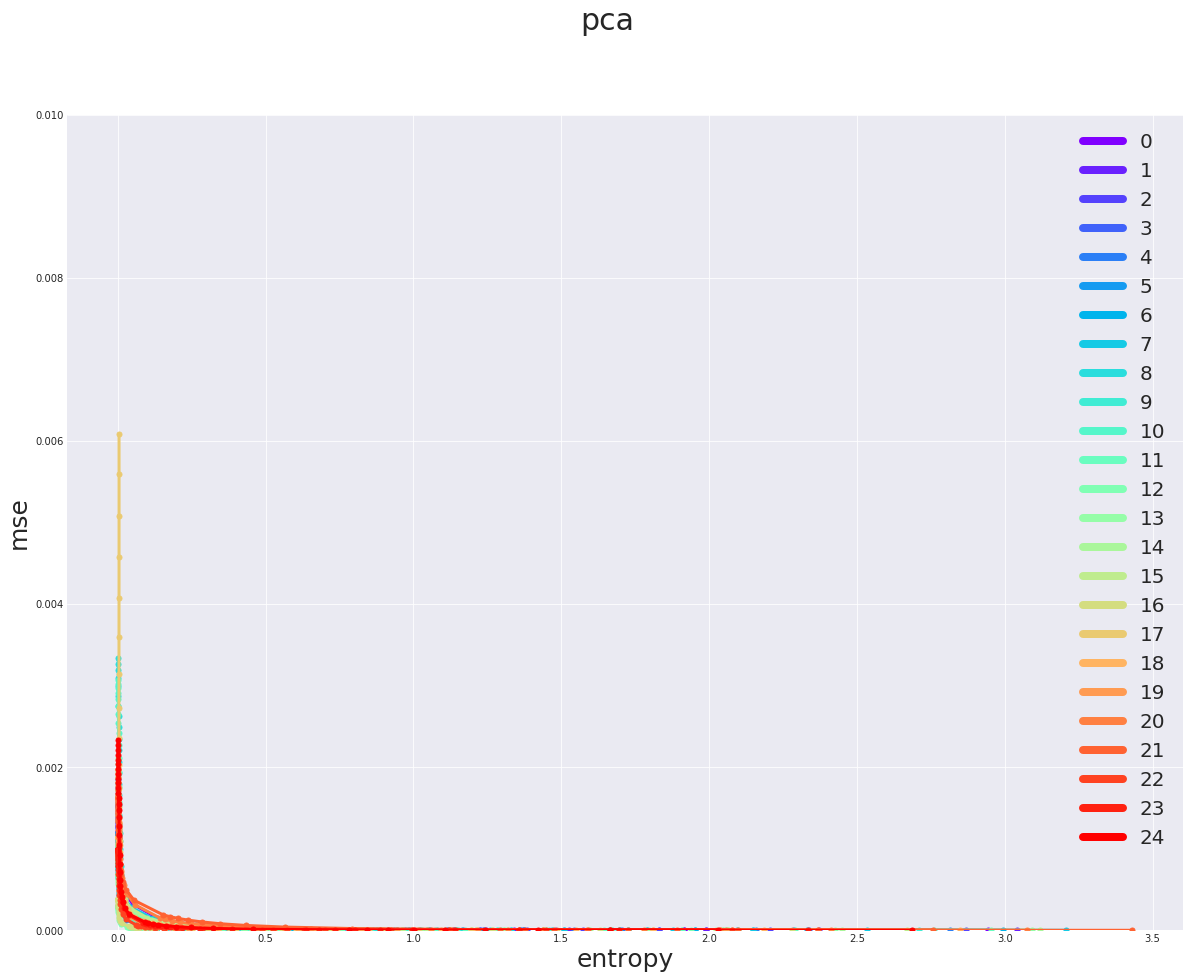

In [21]:
plot_rd_by_img_per_img(rd_table_crop, "pca", ylim=.01)

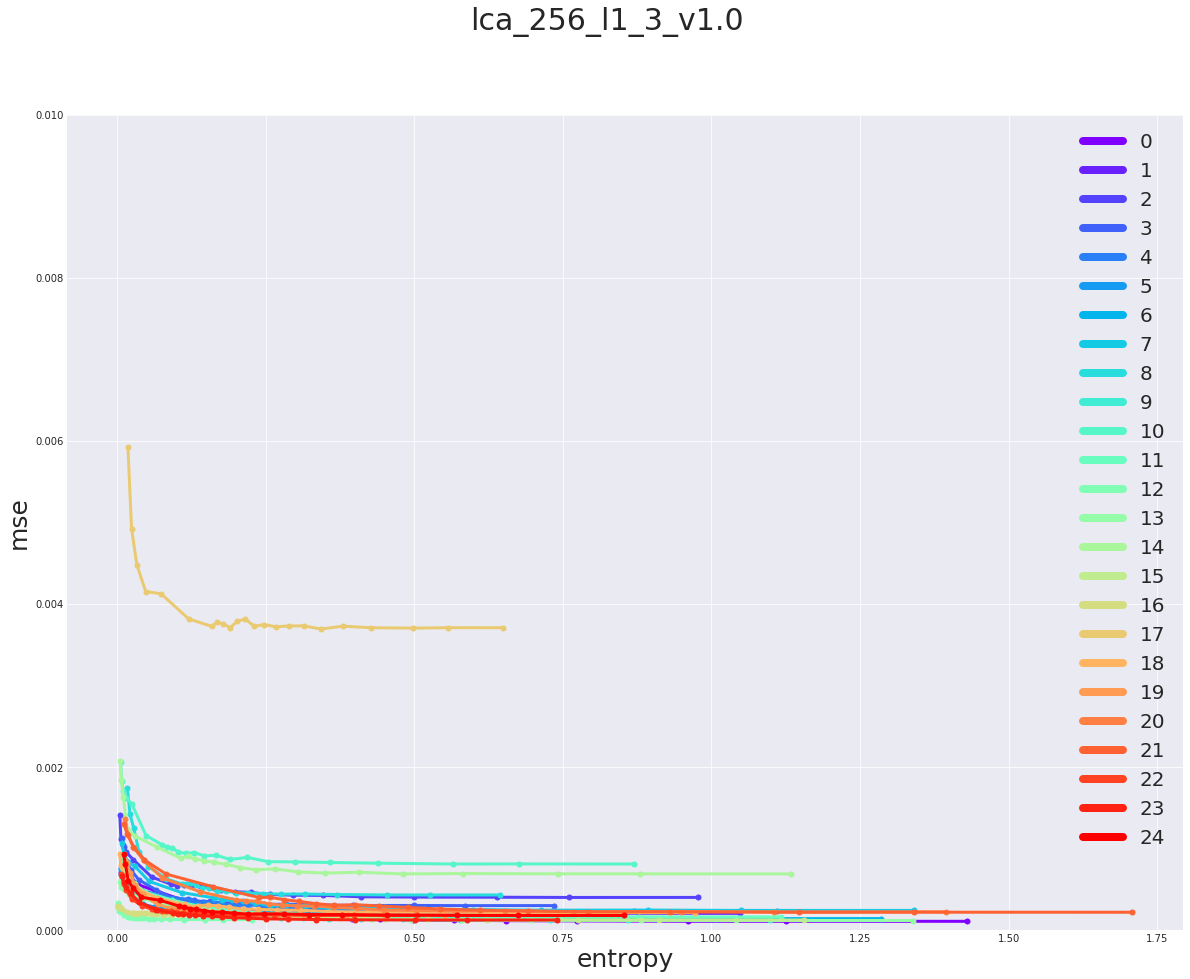

In [48]:
plot_rd_by_img_per_img(rd_table, "lca_256_l1_3_v1.0", ylim=.01)

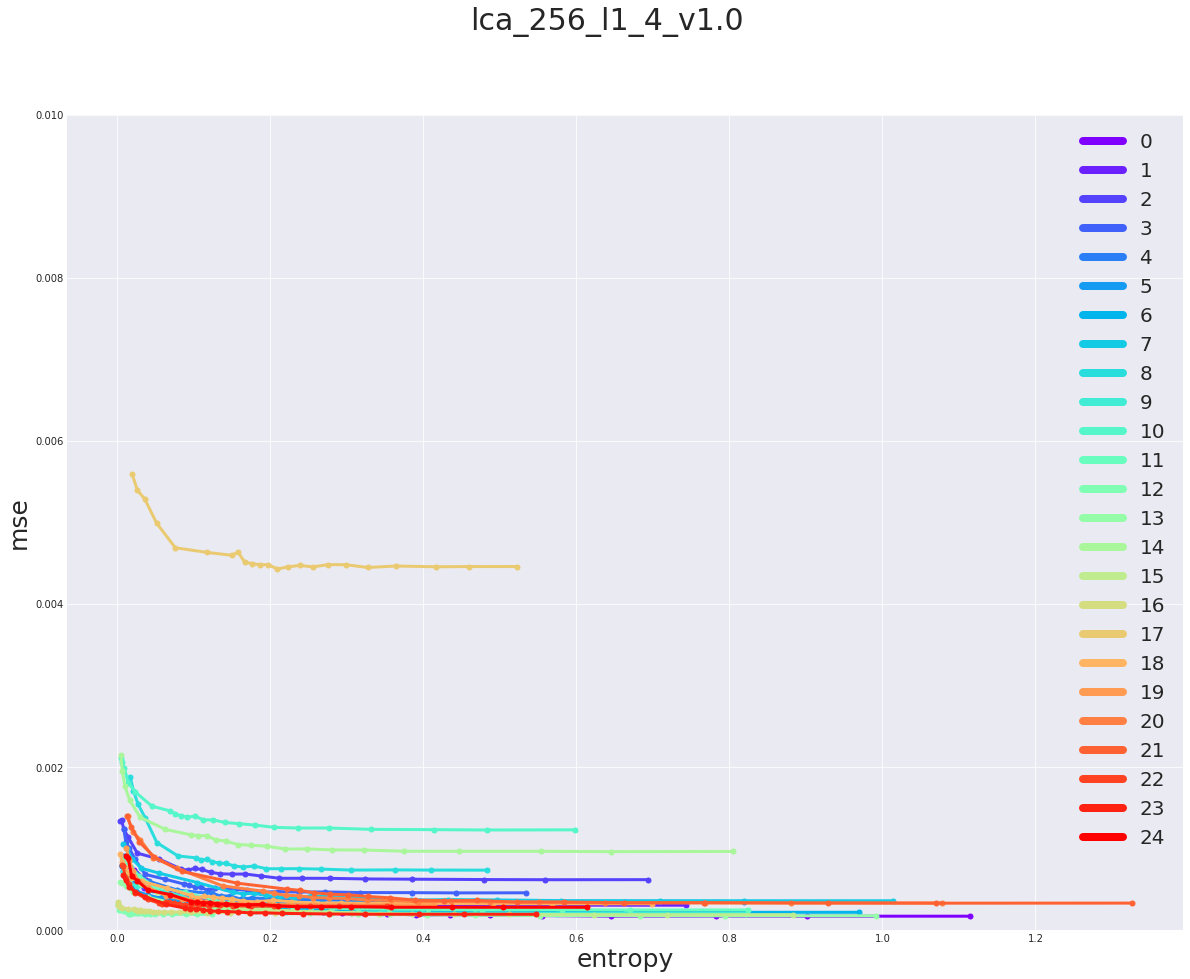

In [49]:
plot_rd_by_img_per_img(rd_table, "lca_256_l1_4_v1.0", ylim=.01)

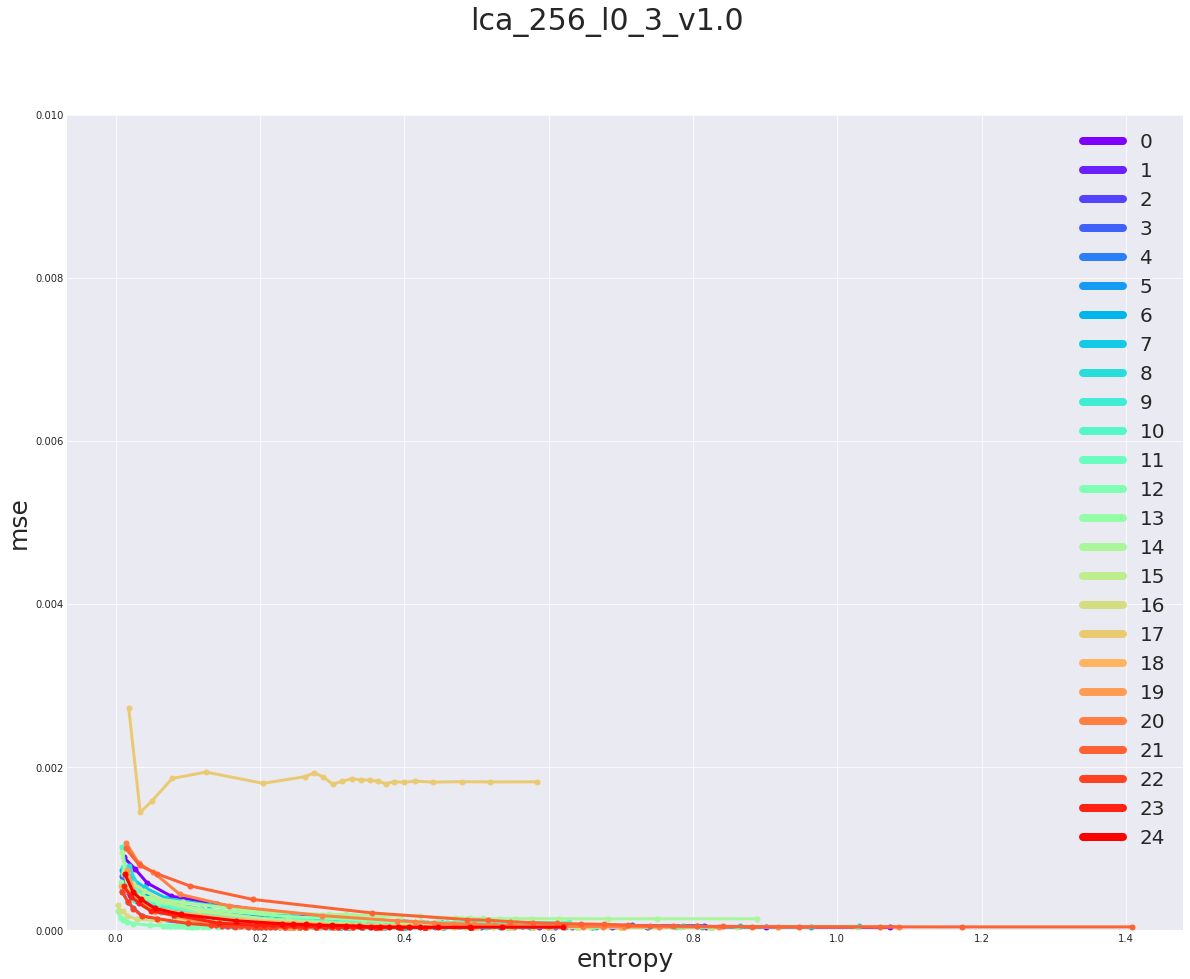

In [50]:
plot_rd_by_img_per_img(rd_table, "lca_256_l0_3_v1.0", ylim=.01)

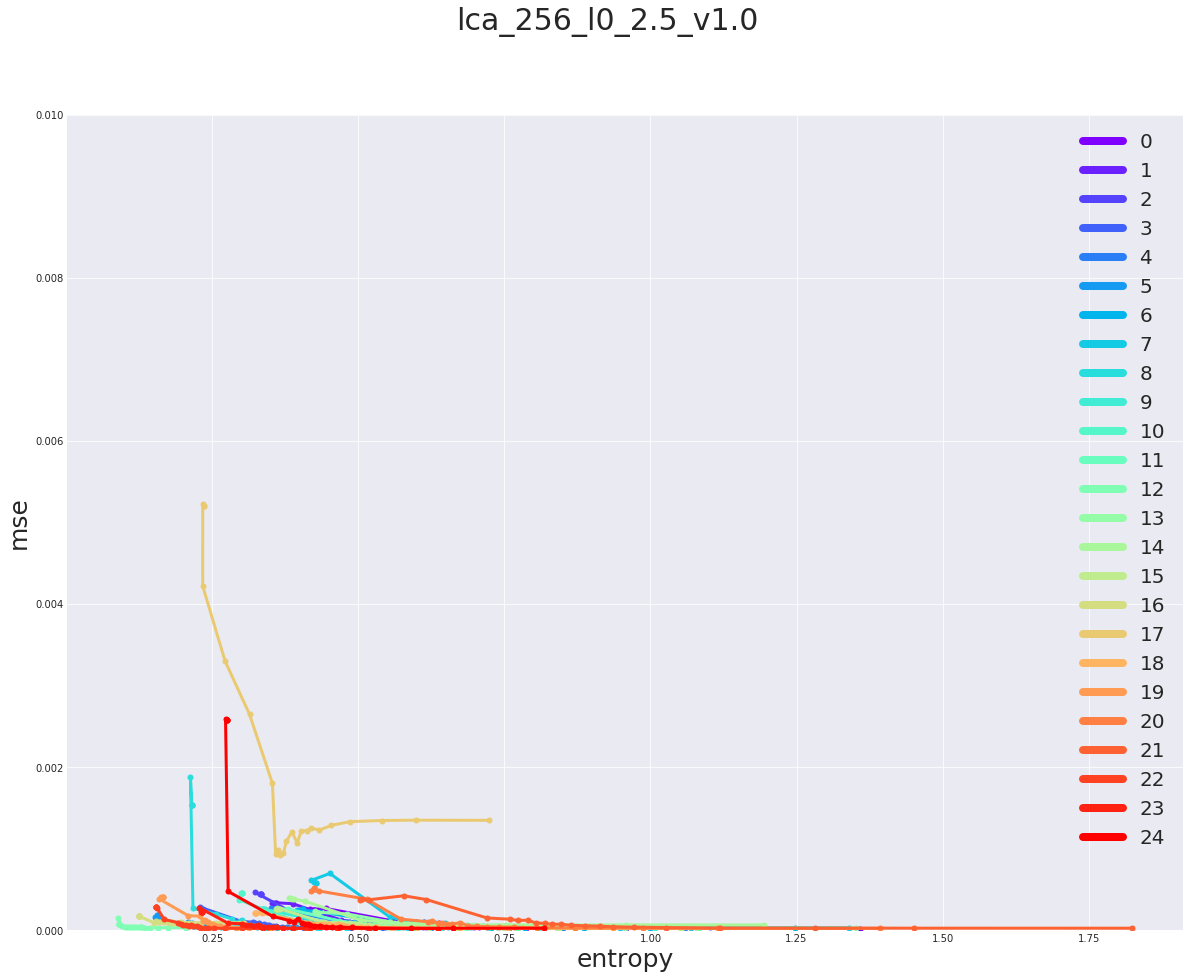

In [53]:
plot_rd_by_img_per_img(rd_table_lloyd, "lca_256_l0_2.5_v1.0", ylim=.01)

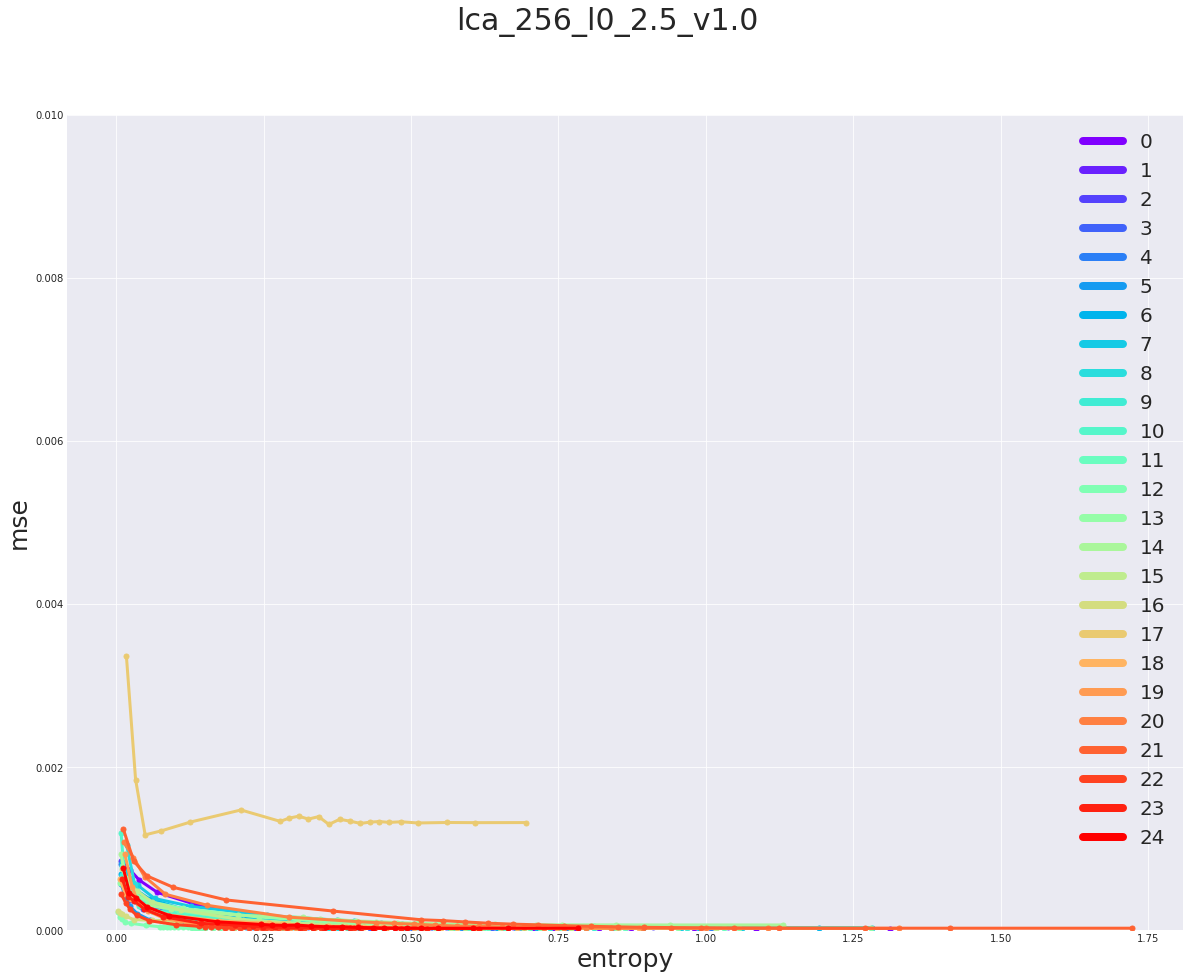

In [51]:
plot_rd_by_img_per_img(rd_table, "lca_256_l0_2.5_v1.0", ylim=.01)

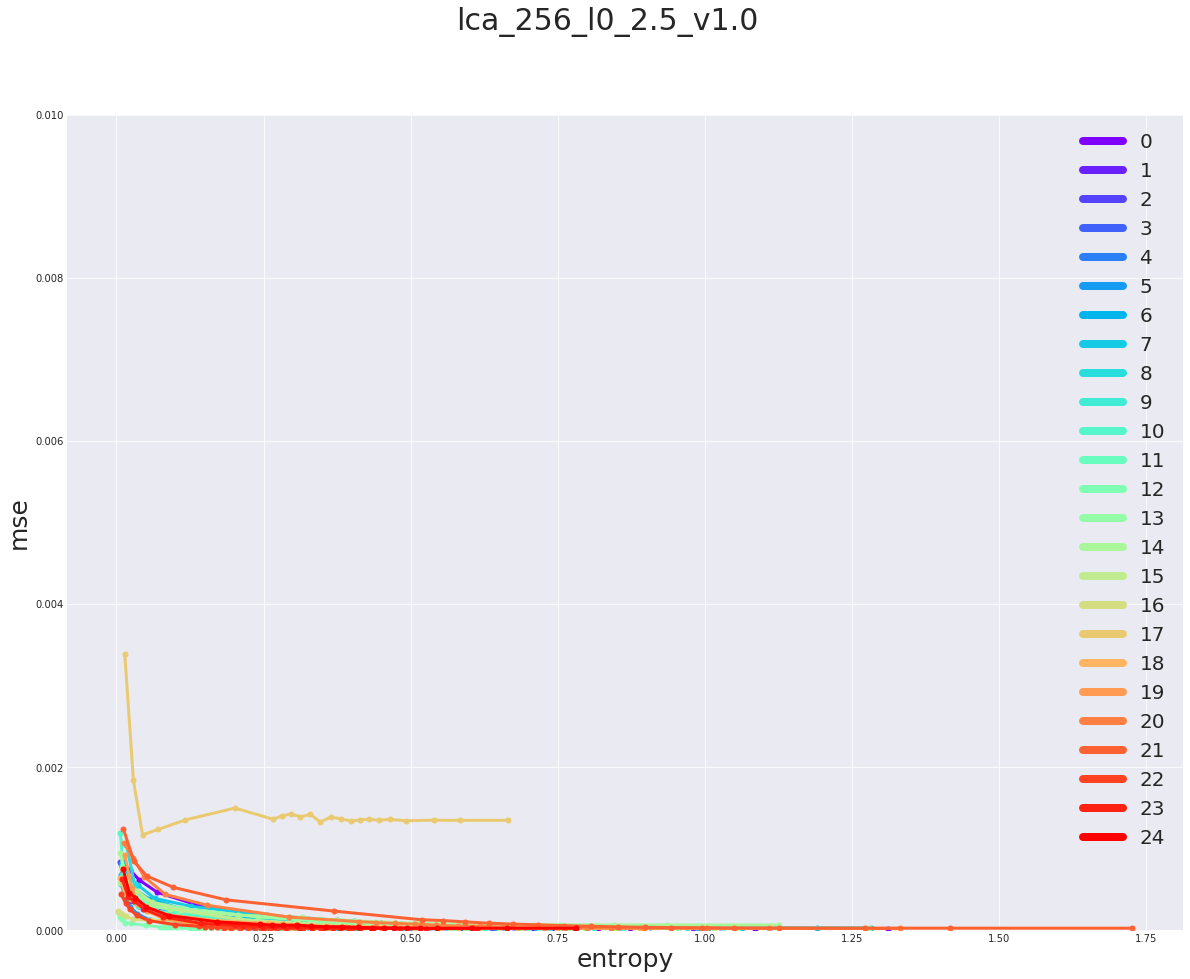

In [22]:
plot_rd_by_img_per_img(rd_table_crop, "lca_256_l0_2.5_v1.0", ylim=.01)

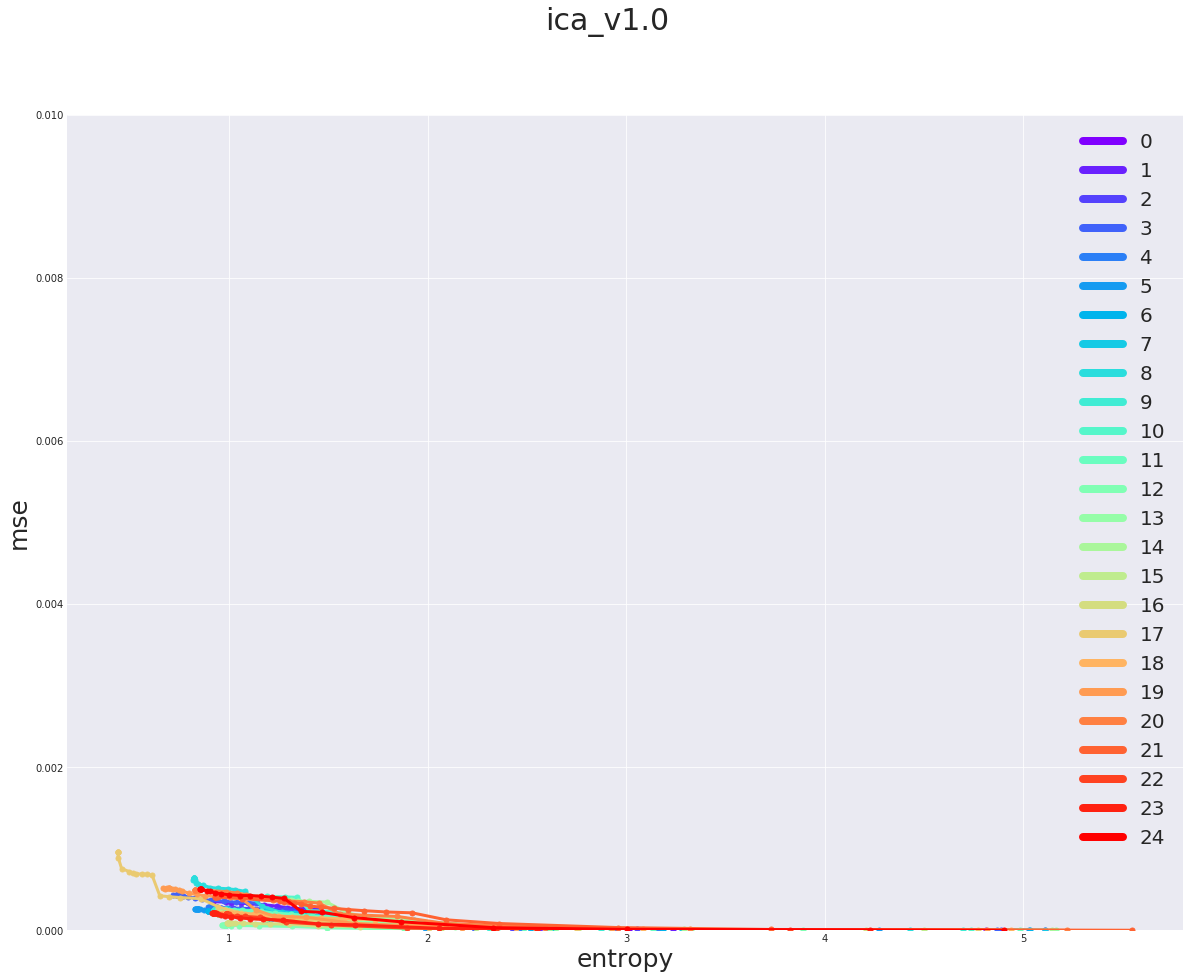

In [50]:
plot_rd_by_img_per_img(rd_table_lloyd, "ica_v1.0",  ylim=.01)

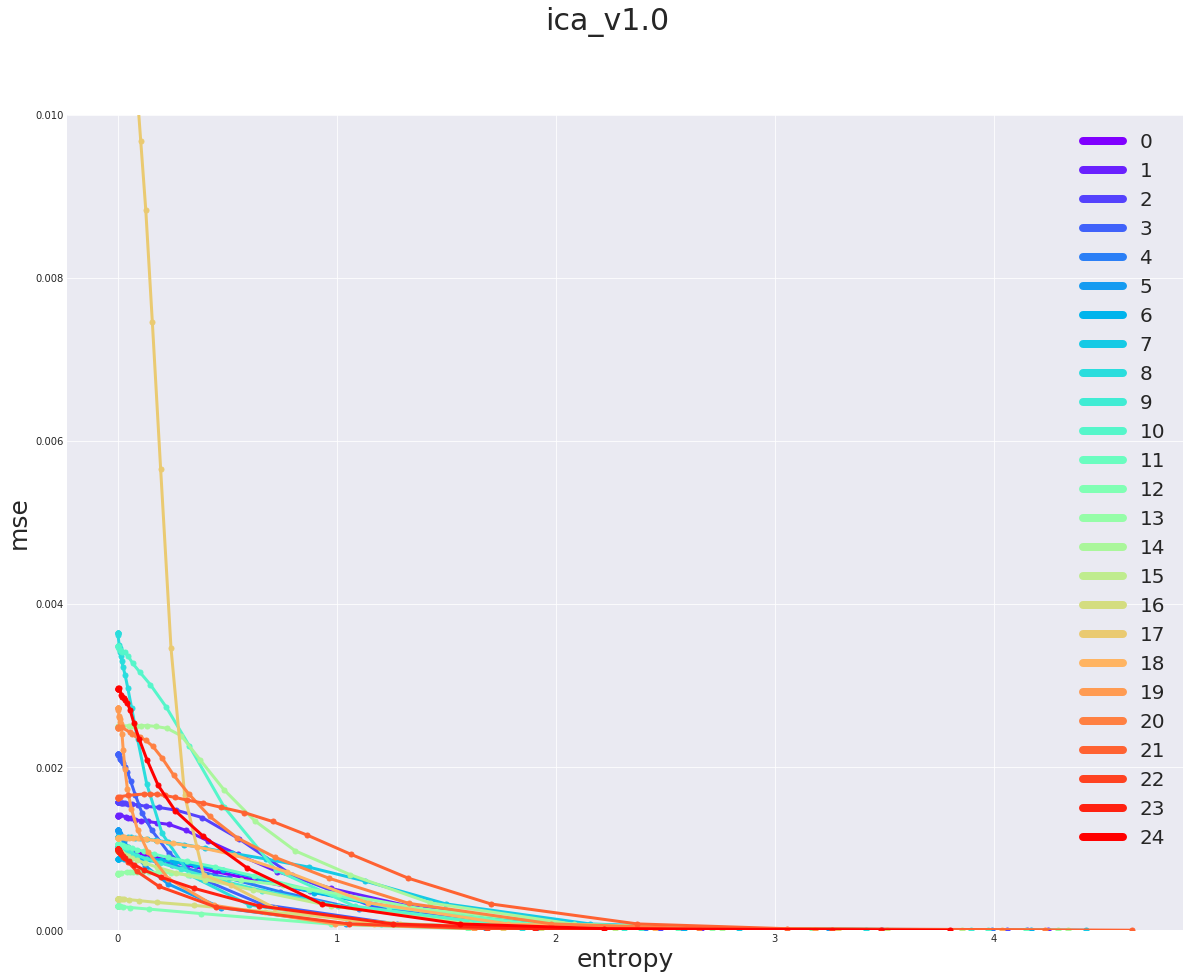

In [52]:
plot_rd_by_img_per_img(rd_table, "ica_v1.0",  ylim=.01)

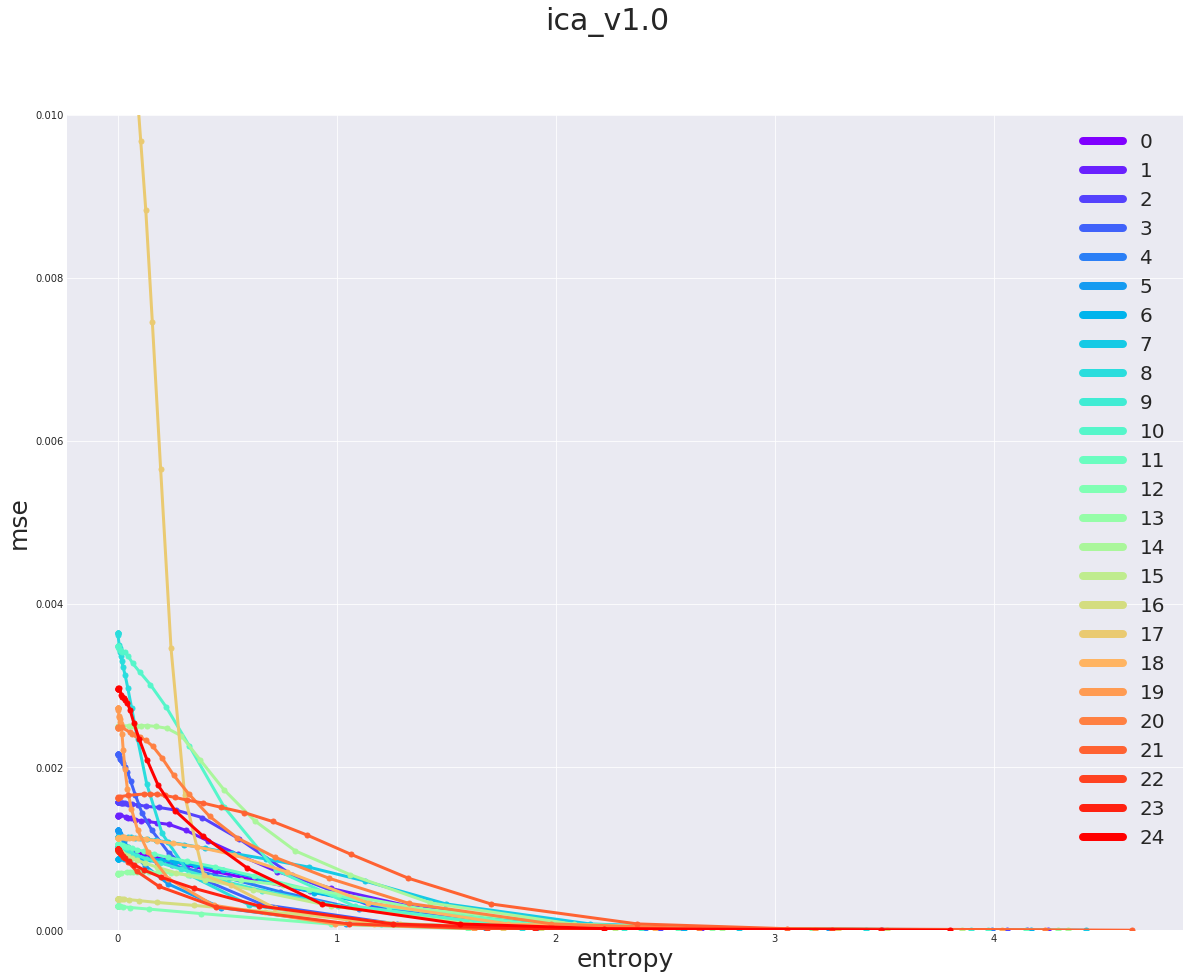

In [18]:
plot_rd_by_img_per_img(rd_table_crop, "ica_v1.0",  ylim=.01)

## SSIM 

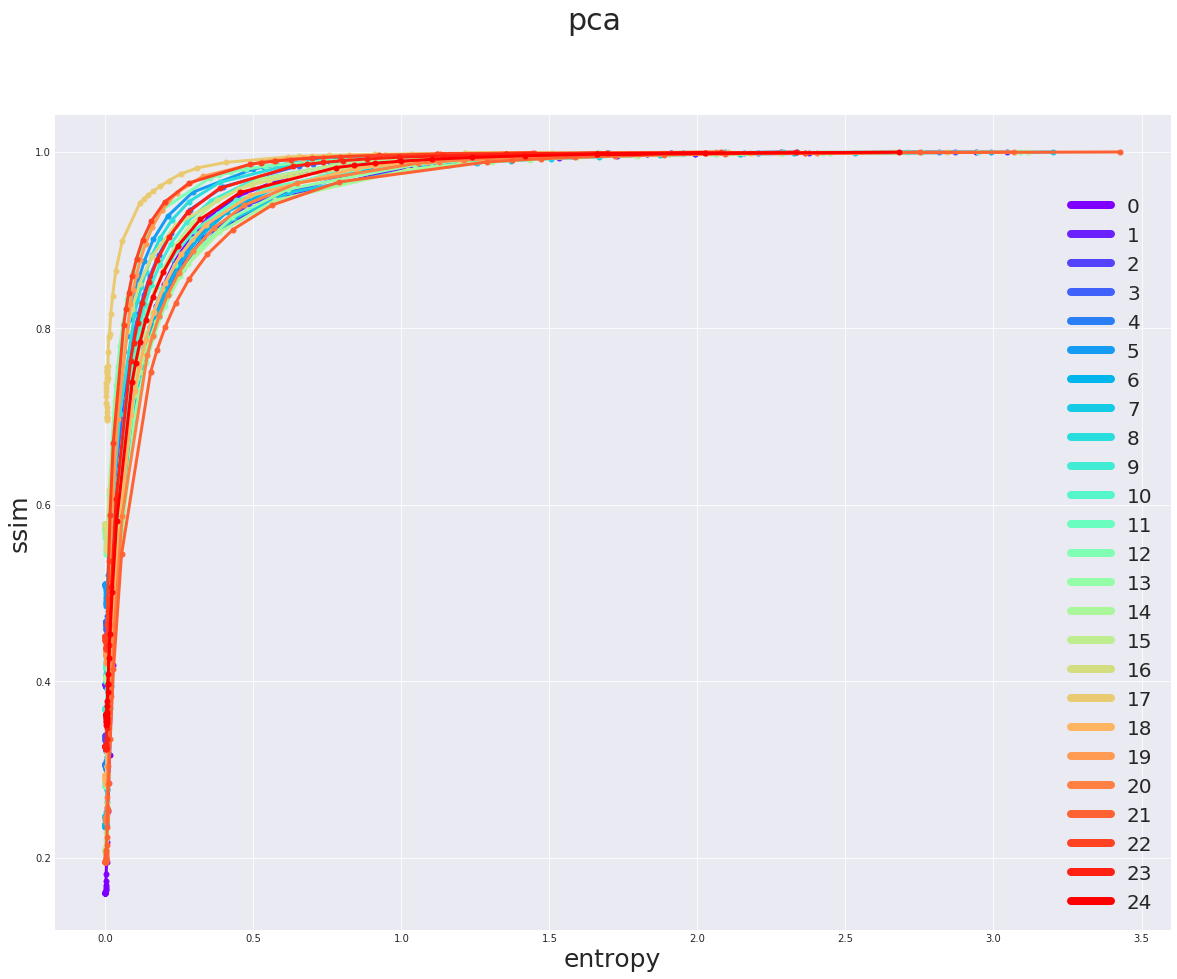

In [55]:
plot_rd_by_img_per_img(rd_table, "pca",  yval="ssim")

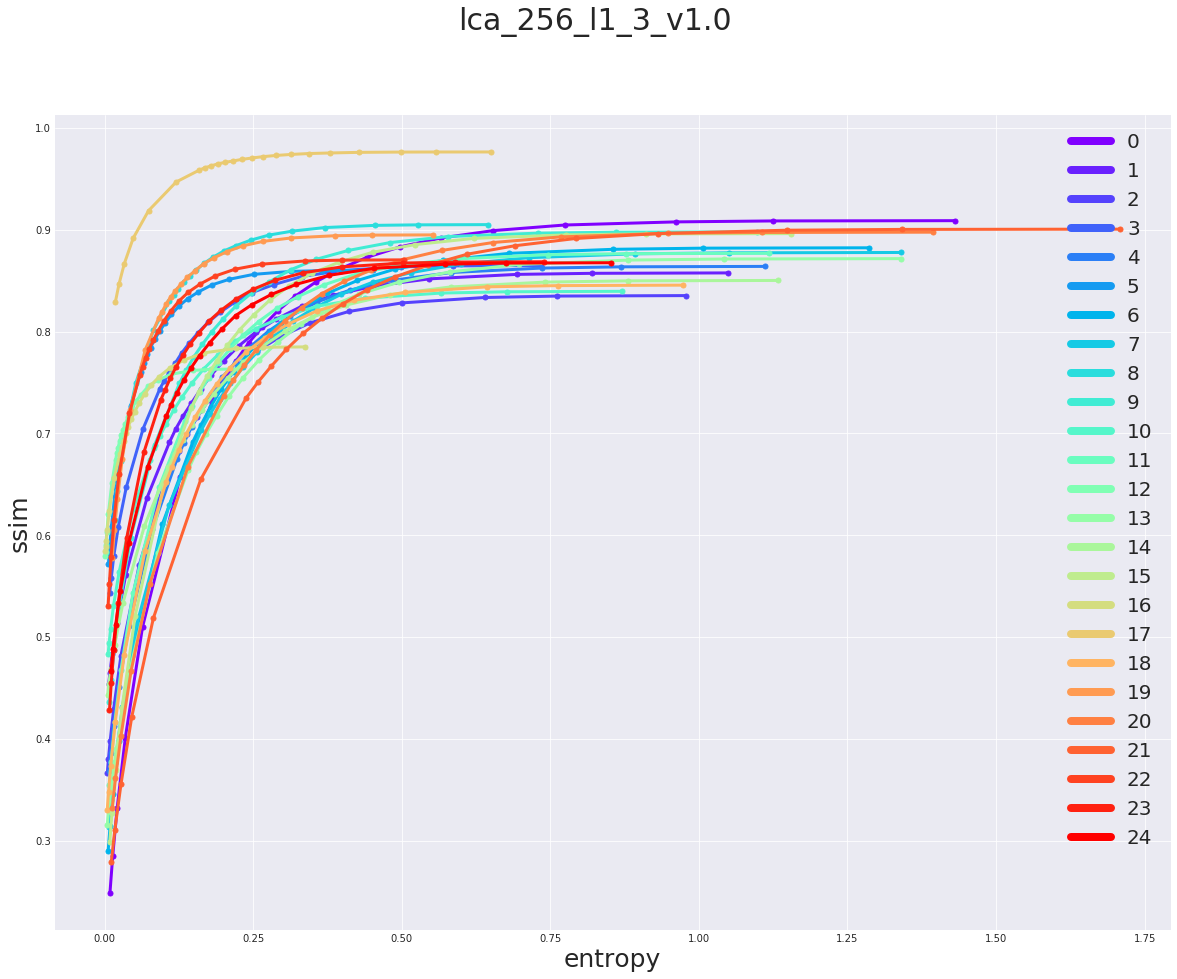

In [56]:
plot_rd_by_img_per_img(rd_table, "lca_256_l1_3_v1.0",  yval="ssim")

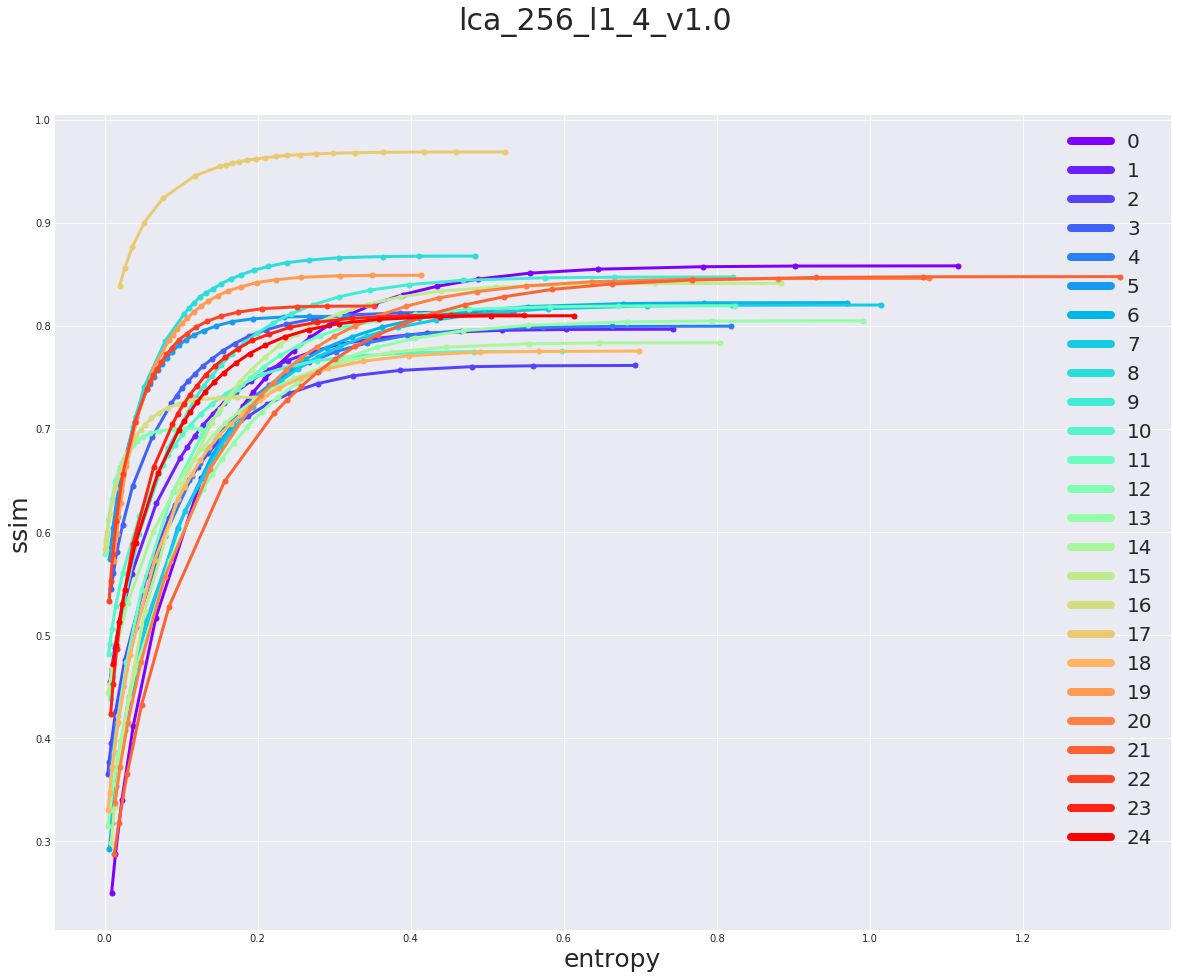

In [57]:
plot_rd_by_img_per_img(rd_table, "lca_256_l1_4_v1.0",  yval="ssim")

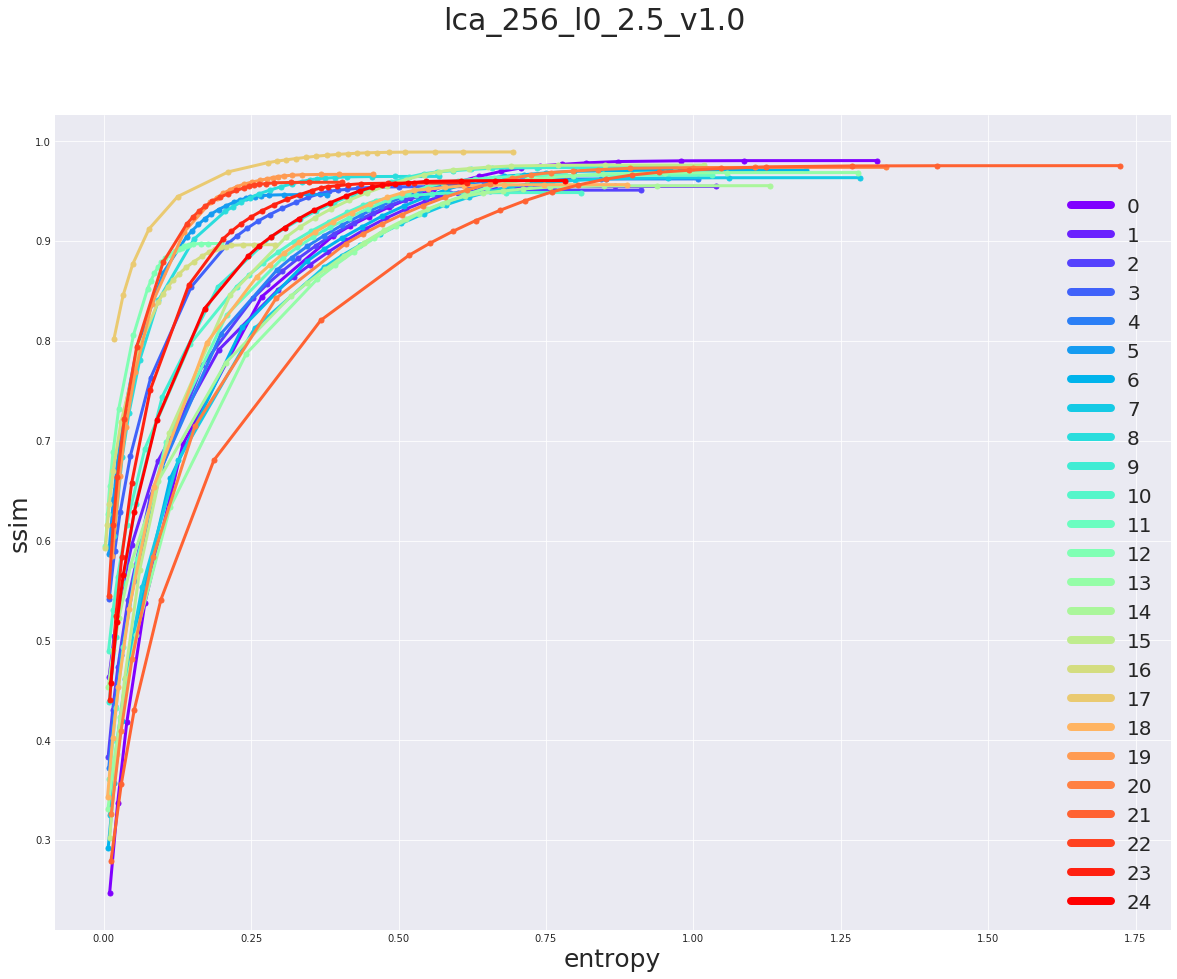

In [58]:
plot_rd_by_img_per_img(rd_table, "lca_256_l0_2.5_v1.0",  yval="ssim")

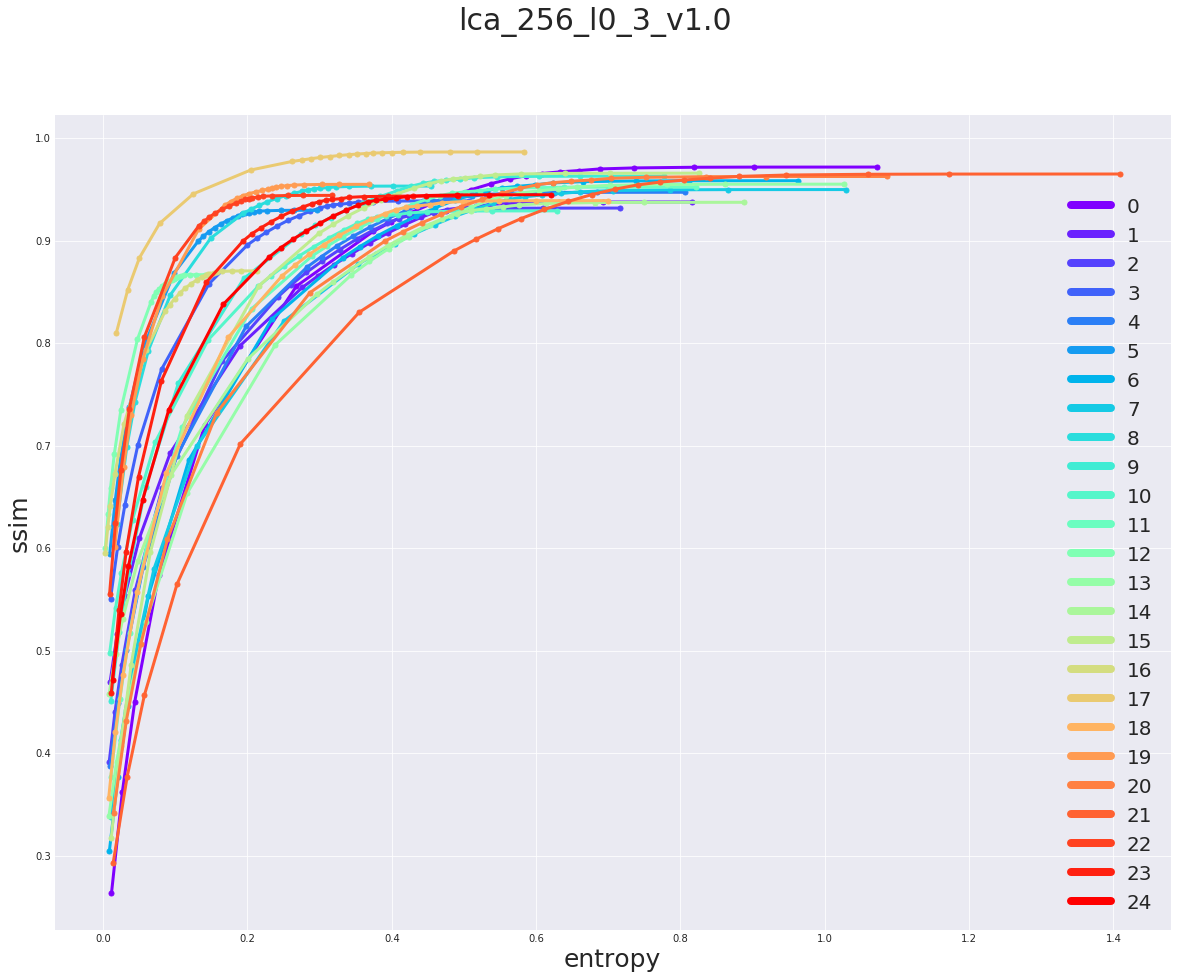

In [59]:
plot_rd_by_img_per_img(rd_table, "lca_256_l0_3_v1.0",  yval="ssim")

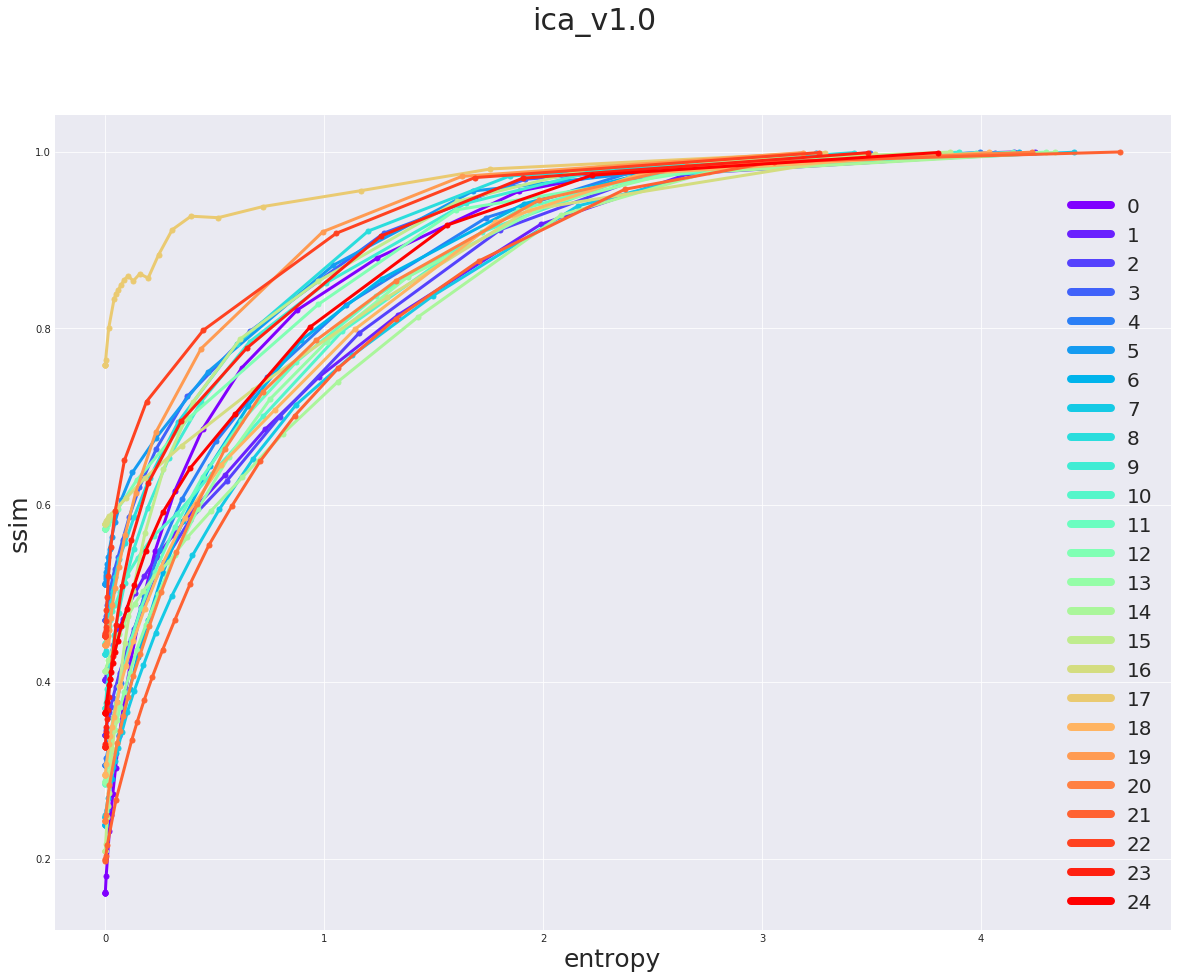

In [54]:
plot_rd_by_img_per_img(rd_table, "ica_v1.0",  yval="ssim")

# RD Summary Plots

## MSE

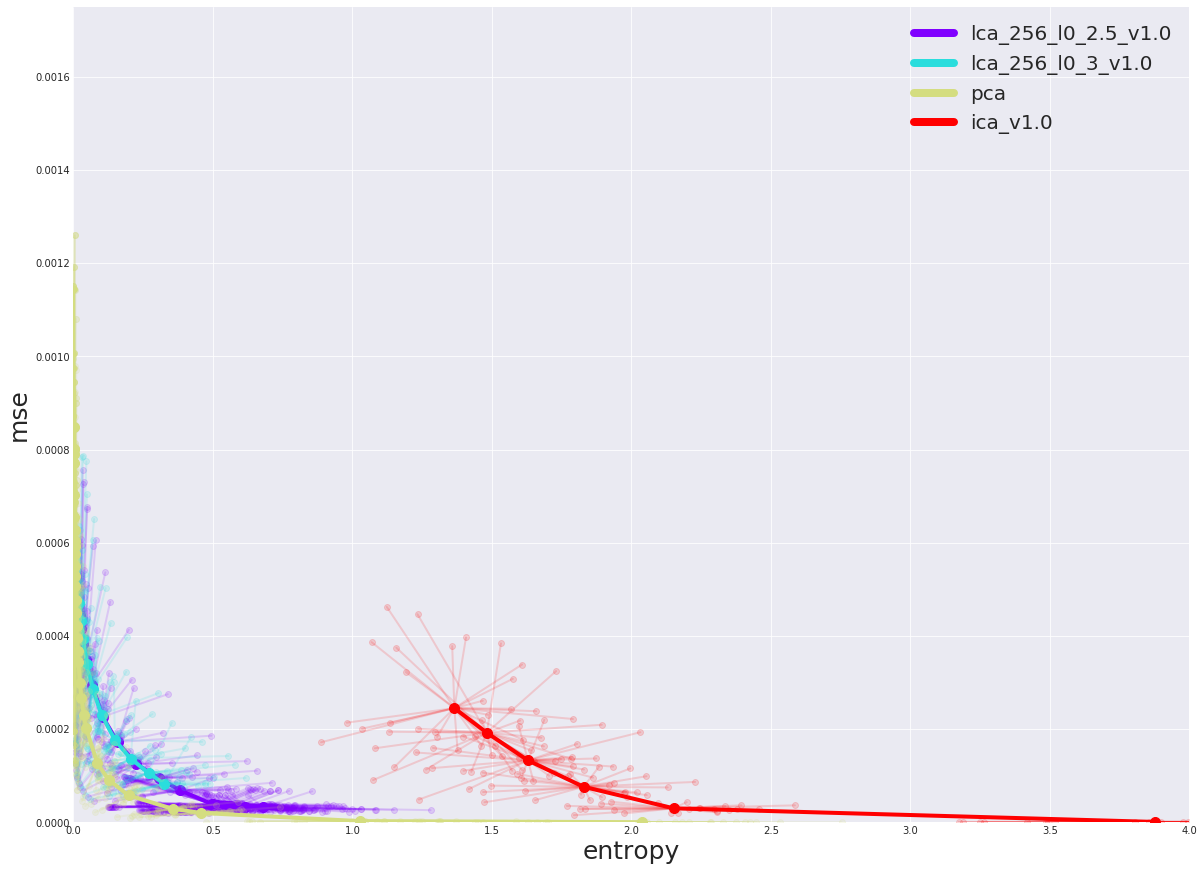

In [52]:
plot_rd_by_img(rd_table_lloyd, yval="mse", cmap="rainbow", xlim=4, ylim=.00175)

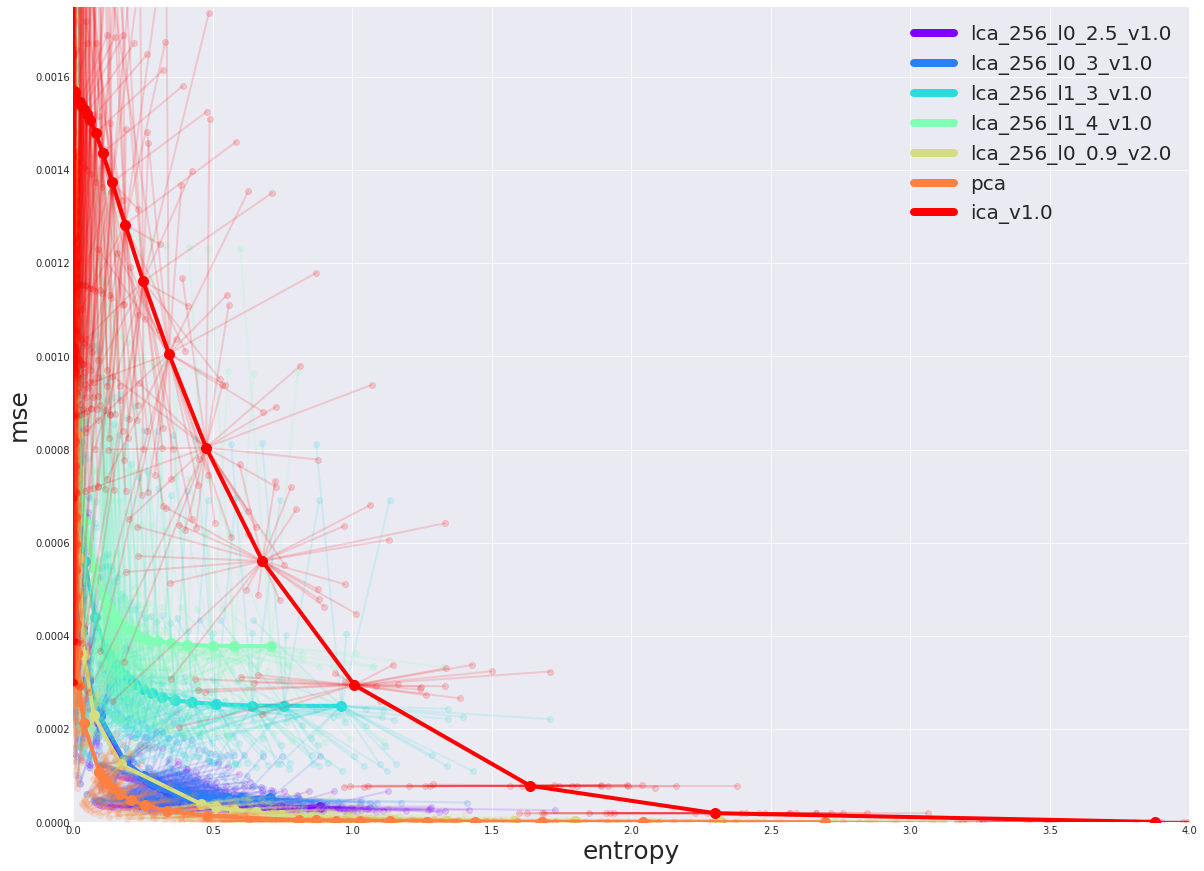

In [62]:
plot_rd_by_img(rd_table, yval="mse", cmap="rainbow", xlim=4, ylim=.00175)

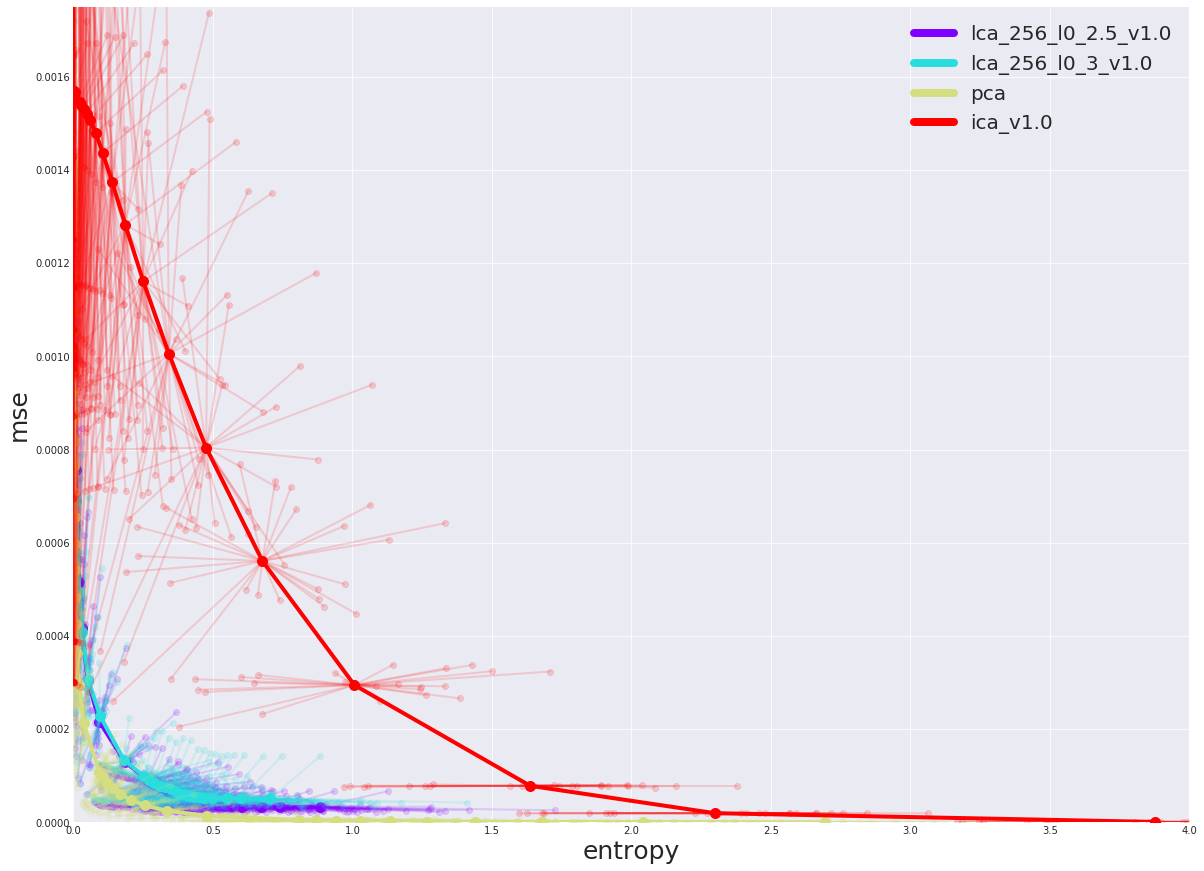

In [76]:
plot_rd_by_img(rd_table_crop, yval="mse", cmap="rainbow", xlim=4, ylim=.00175)

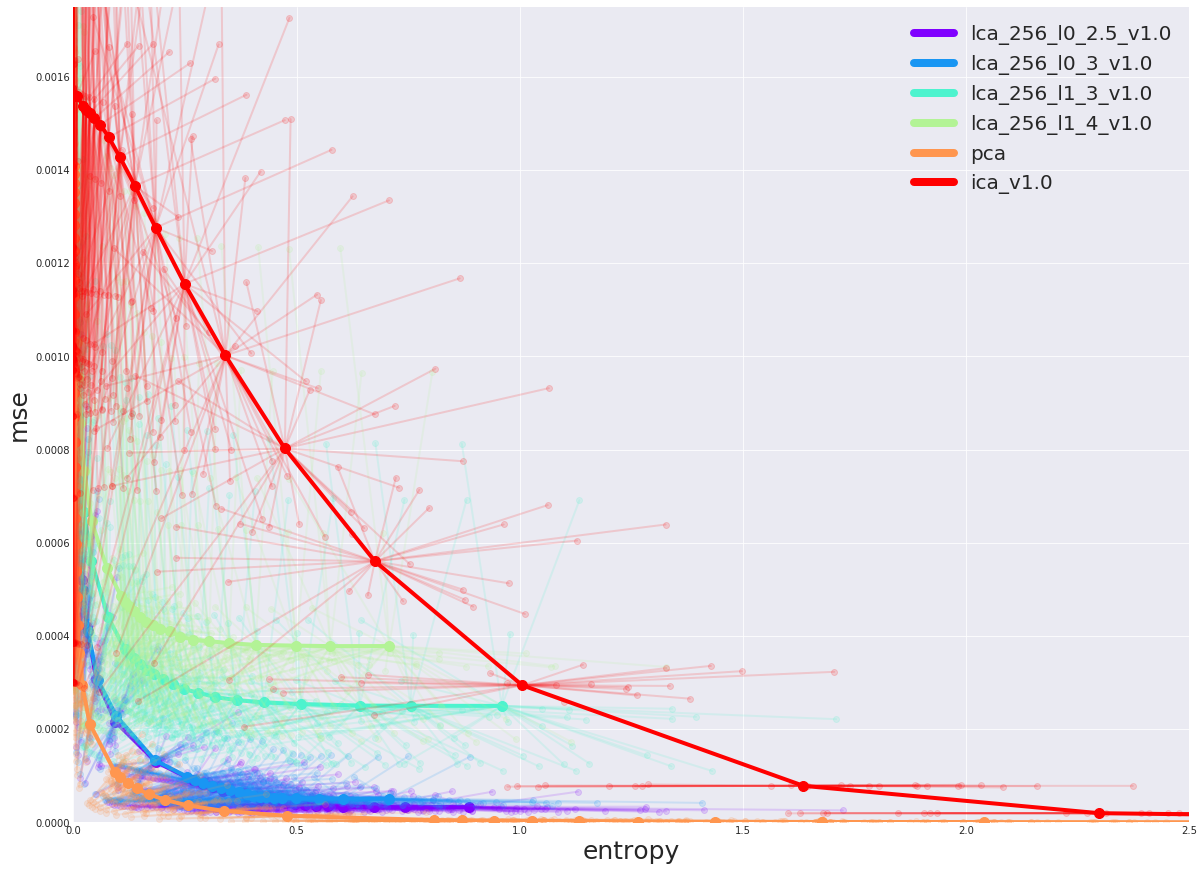

In [61]:
plot_rd_by_img(rd_table, yval="mse", cmap="rainbow", xlim=2.5, ylim=.00175)

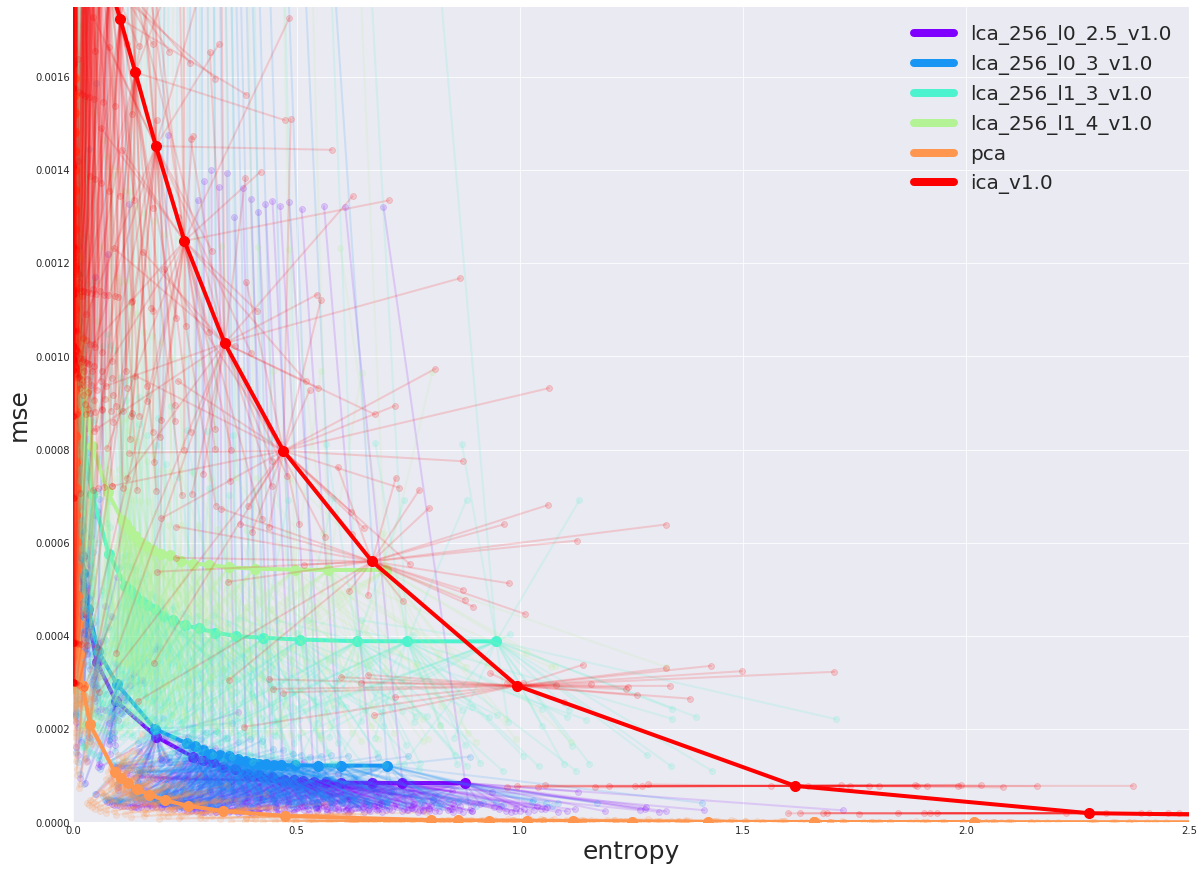

In [66]:
plot_rd_by_img(rd_table, yval="mse", cmap="rainbow", xlim=2.5, ylim=.00175, bad_data_idx=[])

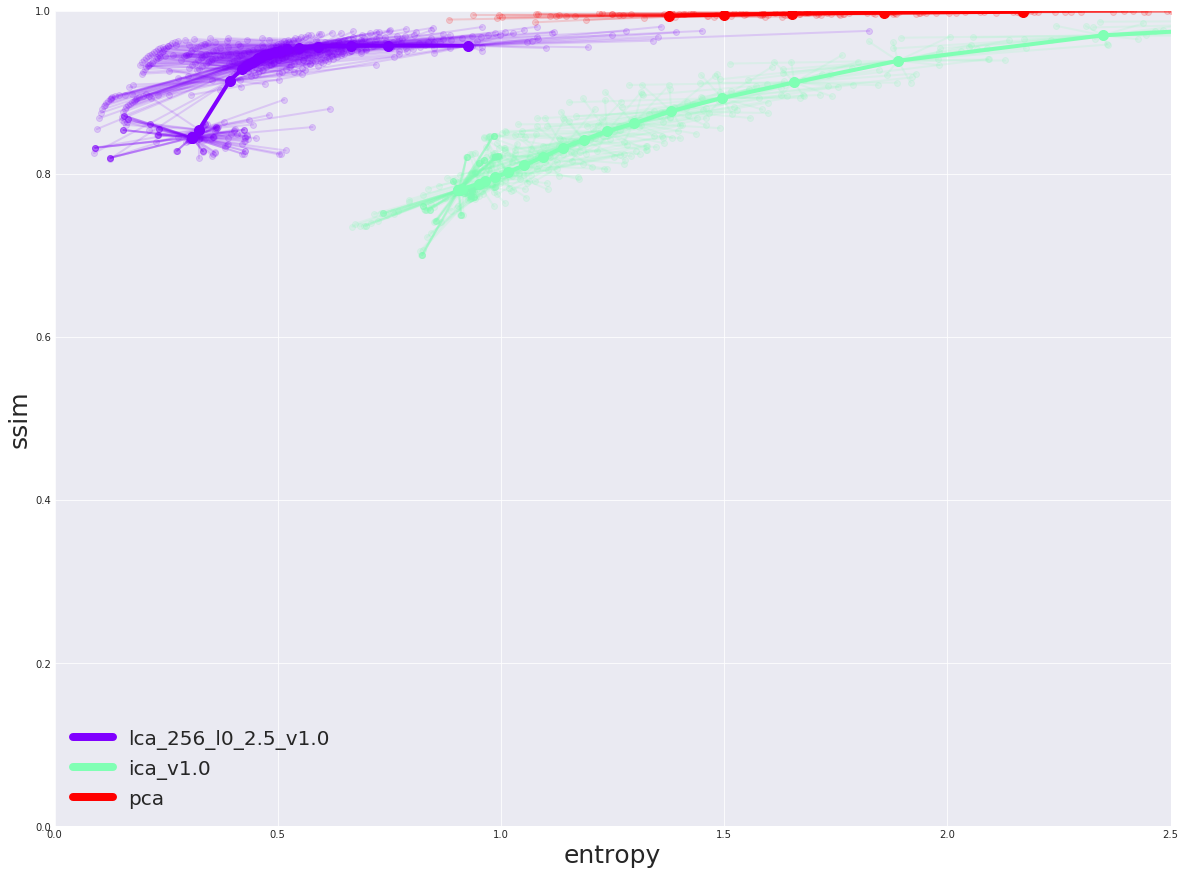

In [69]:
plot_rd_by_img(rd_table_lloyd, yval="ssim", cmap="rainbow", xlim=2.5, ylim=1)

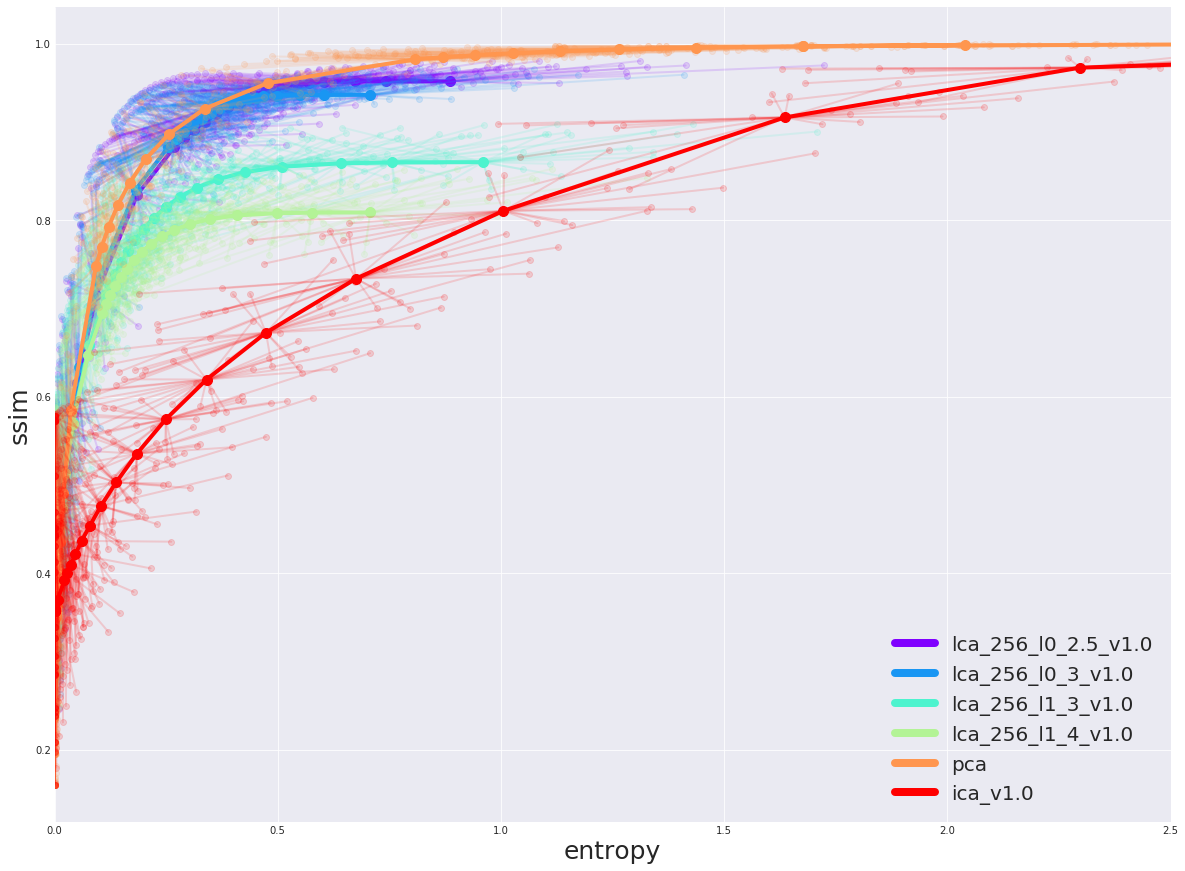

In [65]:
plot_rd_by_img(rd_table, yval="ssim", cmap="rainbow", xlim=2.5)

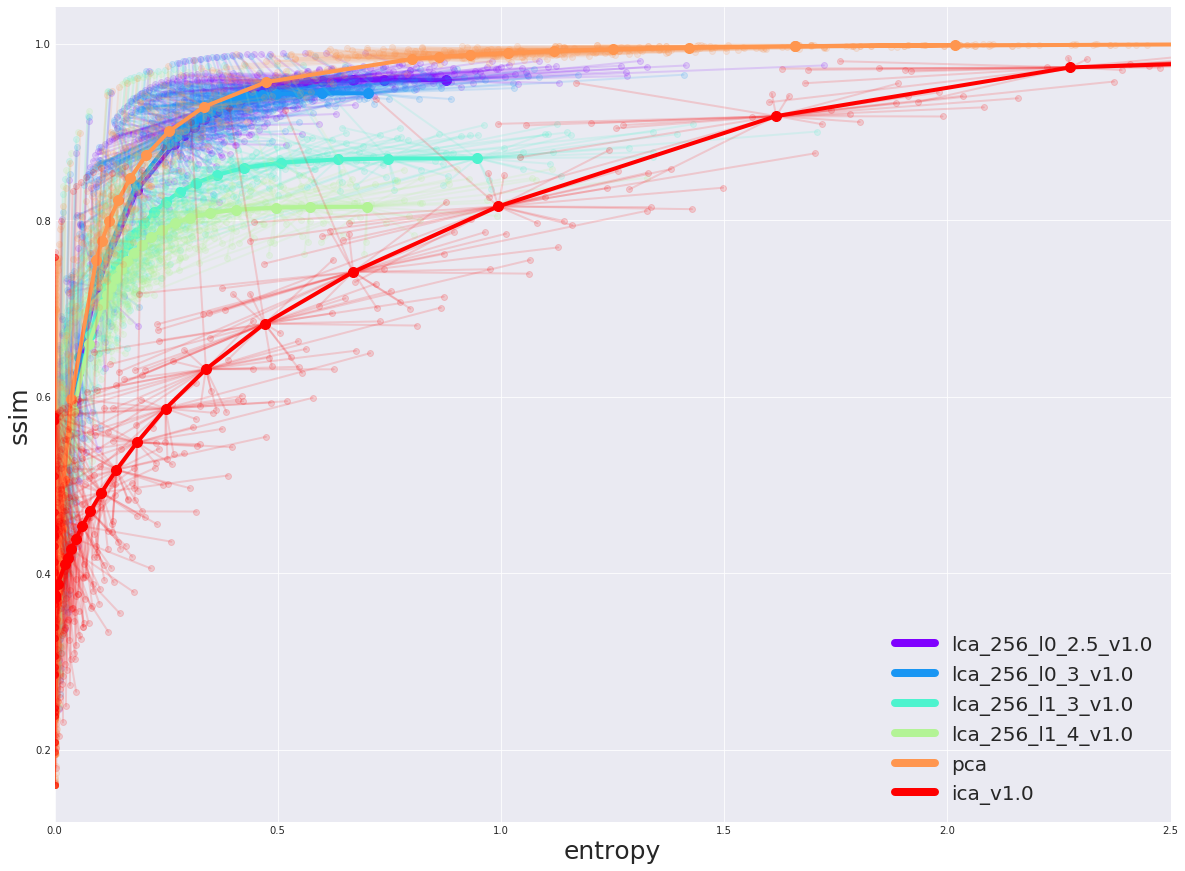

In [64]:
plot_rd_by_img(rd_table, yval="ssim", cmap="rainbow", xlim=2.5, bad_data_idx=[])

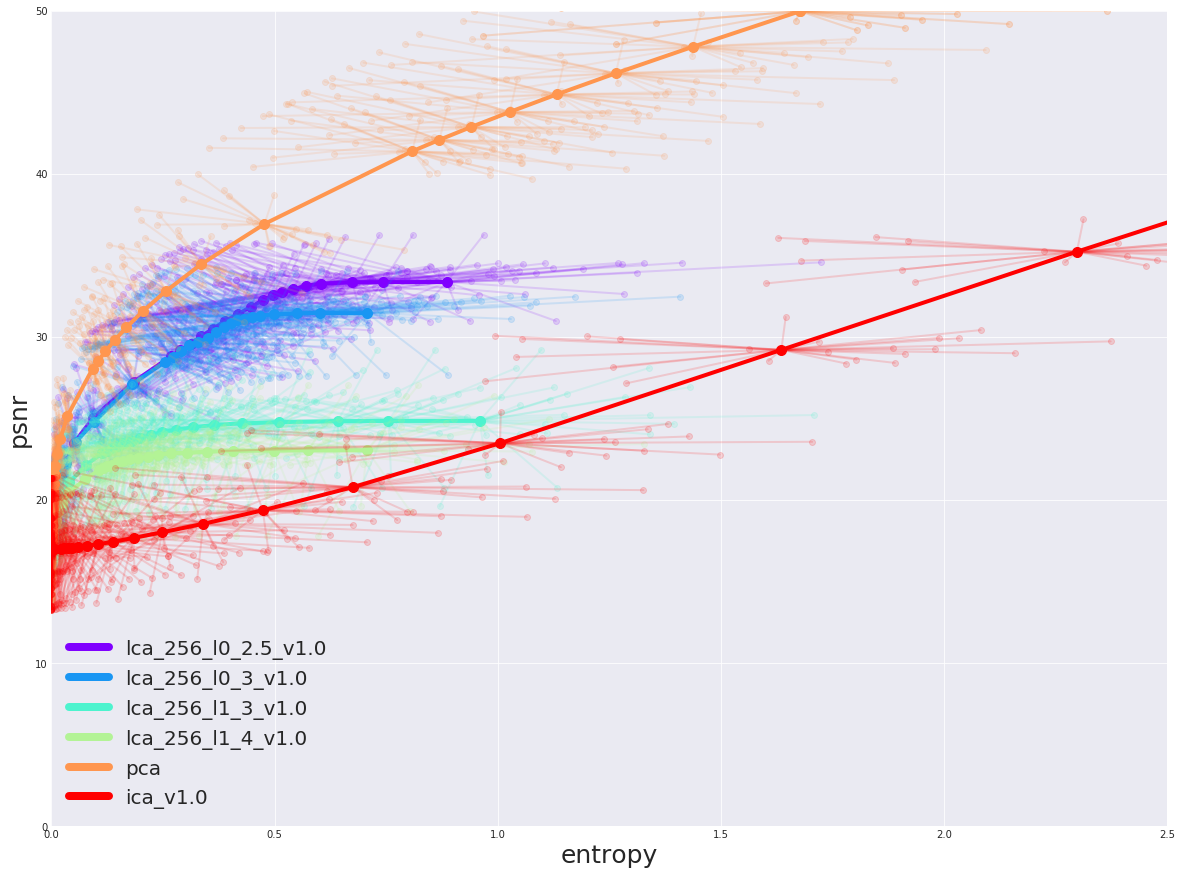

In [43]:
plot_rd_by_img(rd_table, yval="psnr", cmap="rainbow", ylim=50, xlim=2.5)